In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/SEM 7/Data Science Honours/Project/HealthData.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
import pickle

In [4]:
df = pd.read_csv(file_path)

In [5]:
df = df.rename(columns={'num':'target'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###1. age: age in years
###2. sex: sex (1 = male; 0 = female)
###3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
###4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
###5. chol: serum cholestoral in mg/dl
###6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
###7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
###8. thalach: maximum heart rate achieved
###9. exang: exercise induced angina (1 = yes; 0 = no)
###10. oldpeak = ST depression induced by exercise relative to rest
###11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
###12. ca: number of major vessels (0-3) colored by flourosopy
###13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
###14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [7]:
# Let's check if there is any Null value using isnull() method
df.isnull().values.any()

True

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### There are null values in the columns : 'ca', 'thal'

In [9]:
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Null values are successfully replaced with corresponding column mean

In [11]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
180,48,1,4,124,274,0,2,166,0,0.5,2,0.000000,7.0,1
139,51,1,3,125,245,1,2,166,0,2.4,2,0.000000,3.0,0
259,57,1,2,124,261,0,0,141,0,0.3,1,0.000000,7.0,1
17,54,1,4,140,239,0,0,160,0,1.2,1,0.000000,3.0,0
63,54,0,3,135,304,1,0,170,0,0.0,1,0.000000,3.0,0
155,70,1,4,130,322,0,2,109,0,2.4,2,3.000000,3.0,1
94,63,0,3,135,252,0,2,172,0,0.0,1,0.000000,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,0.672241,7.0,1
61,46,0,3,142,177,0,2,160,1,1.4,3,0.000000,3.0,0
38,55,1,4,132,353,0,0,132,1,1.2,2,1.000000,7.0,1


In [12]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Inference: This histogram shows the distribution of Age. Major data is of the age group 50-70

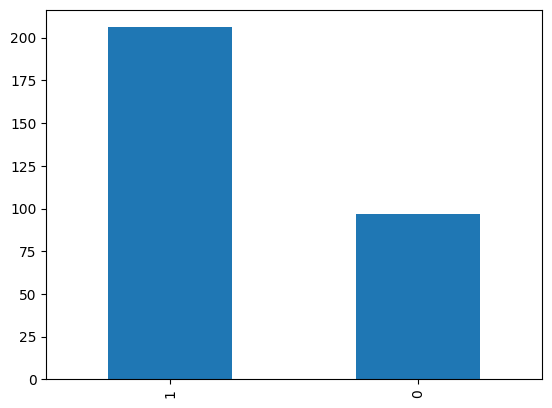

In [14]:
df['sex'].value_counts().plot(kind='bar')  # Create a bar chart
plt.show()

### sex: sex (1 = male; 0 = female)

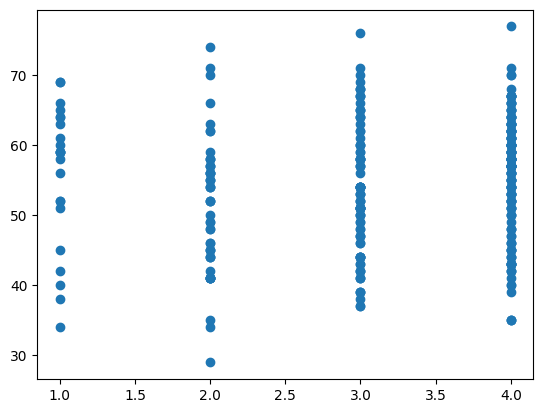

In [15]:
plt.scatter(df['cp'], df['age'])  # Create a scatter plot
plt.show()

cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
       -- Value 4: asymptomatic

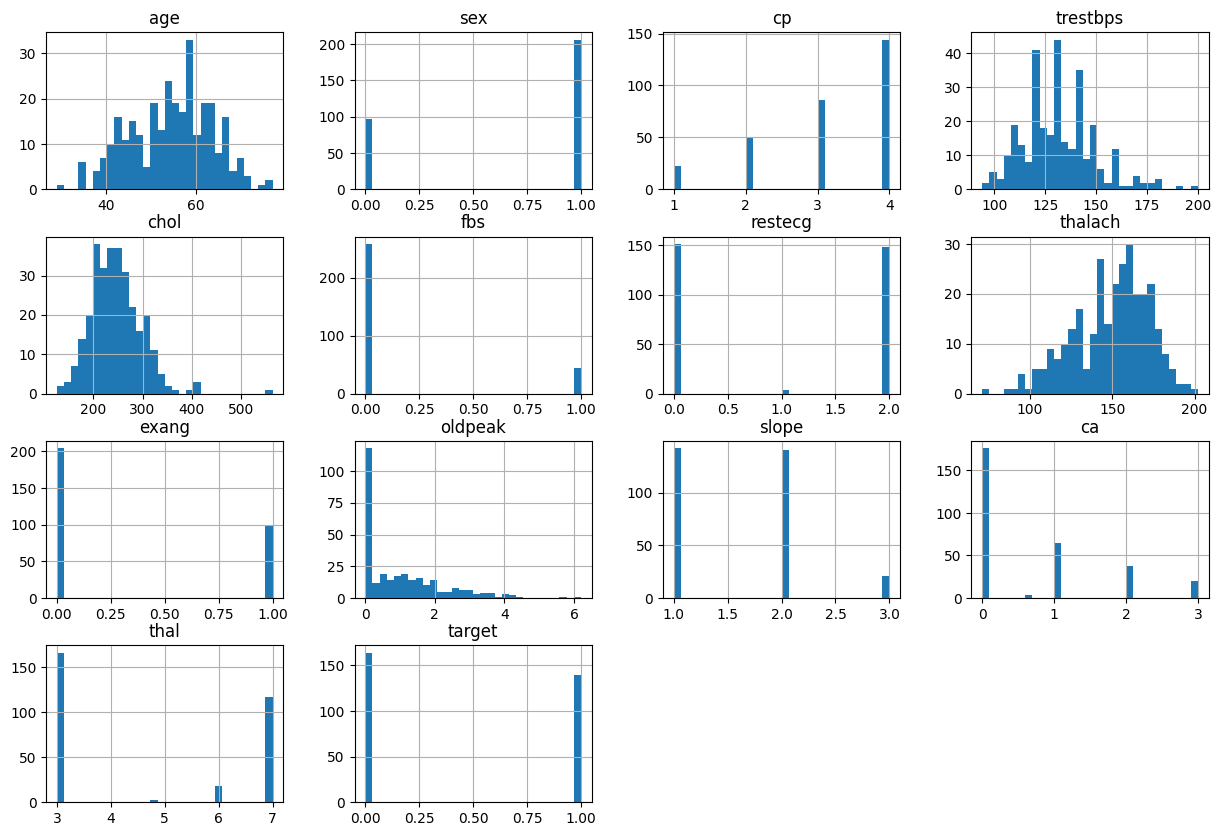

In [16]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

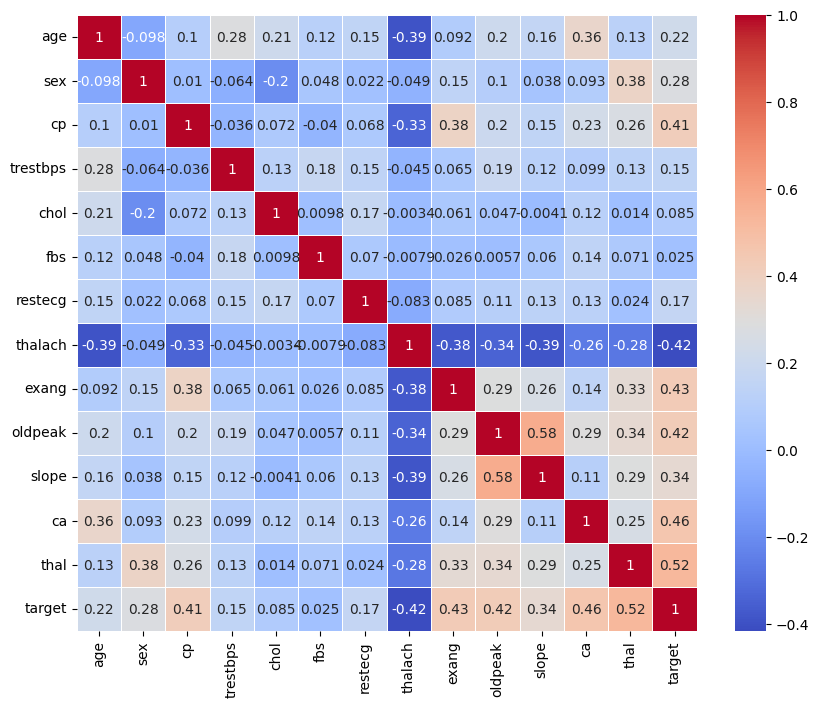

In [17]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

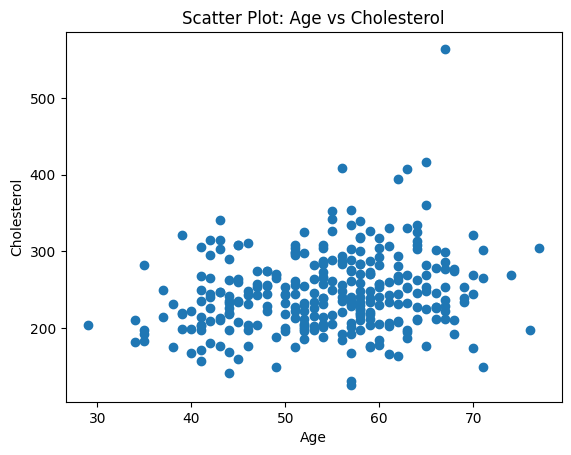

In [18]:
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.show()

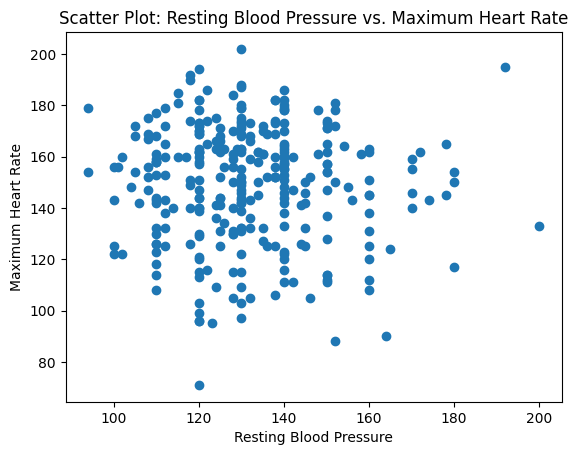

In [19]:
plt.scatter(df['trestbps'], df['thalach'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate')
plt.title('Scatter Plot: Resting Blood Pressure vs. Maximum Heart Rate')
plt.show()

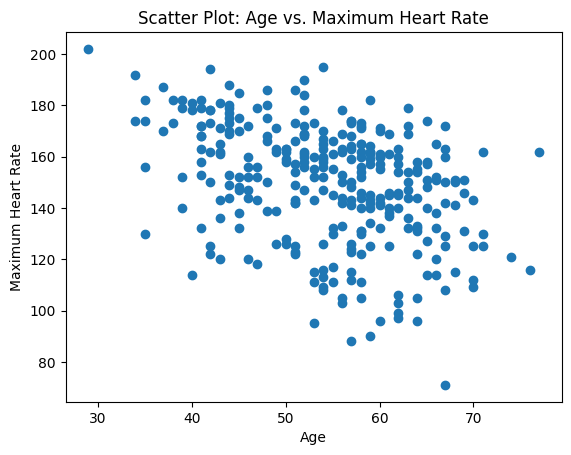

In [20]:
plt.scatter(df['age'], df['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Scatter Plot: Age vs. Maximum Heart Rate')
plt.show()

### Inference: As Age increases, the maximum heart rate decreases.

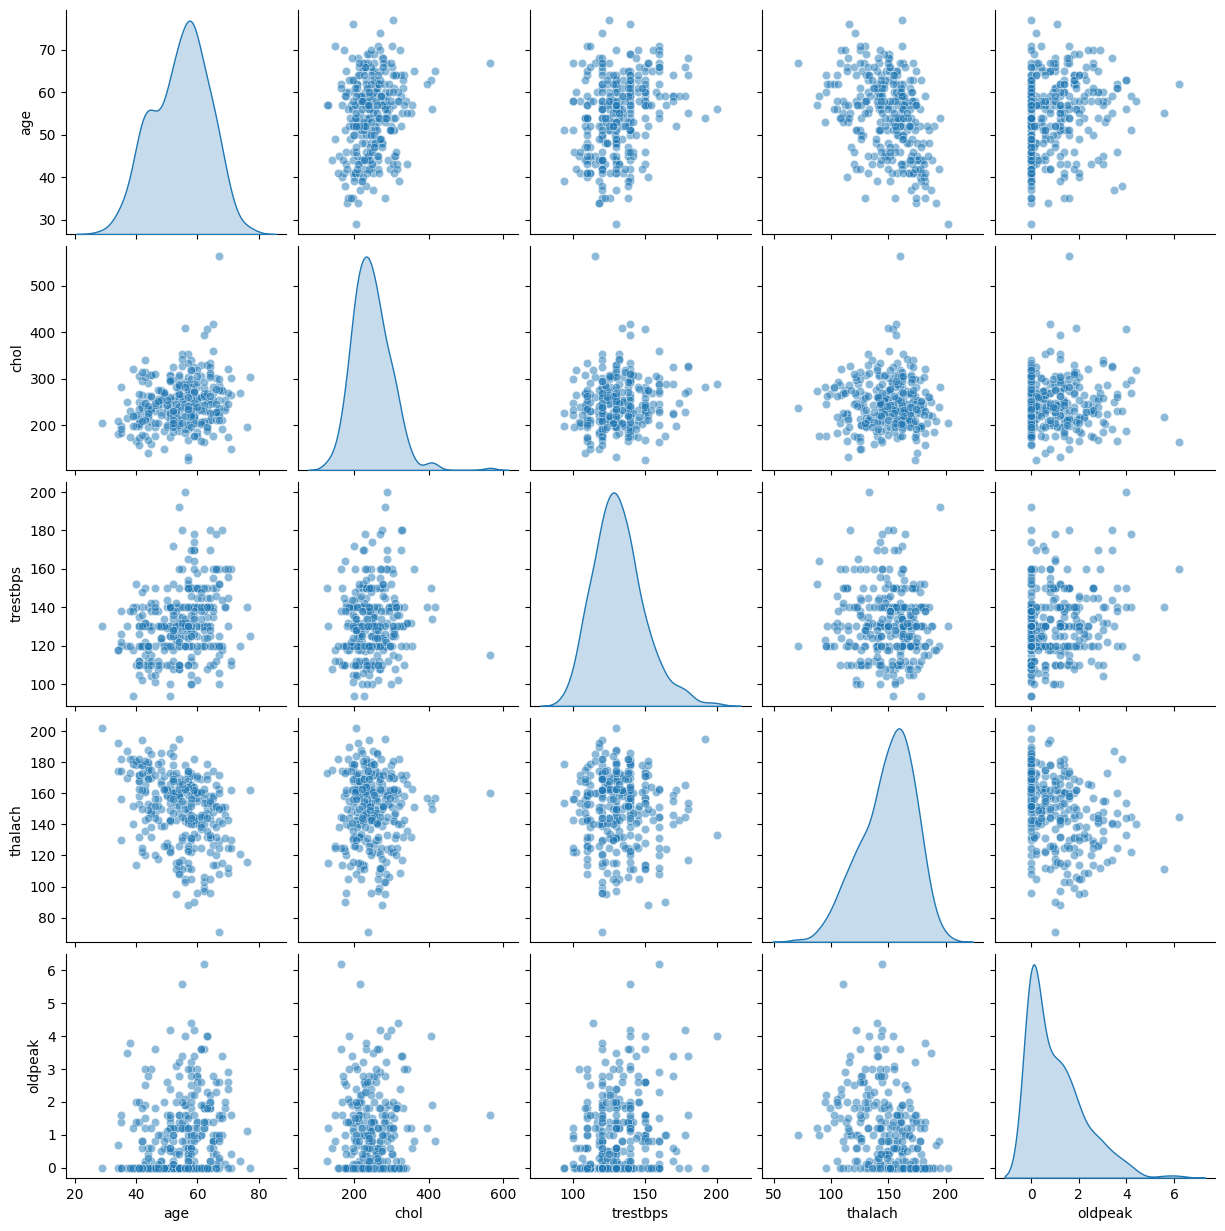

In [21]:
features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

# Replace 'features' with the actual feature names you want to include
sns.pairplot(df[features], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.show()

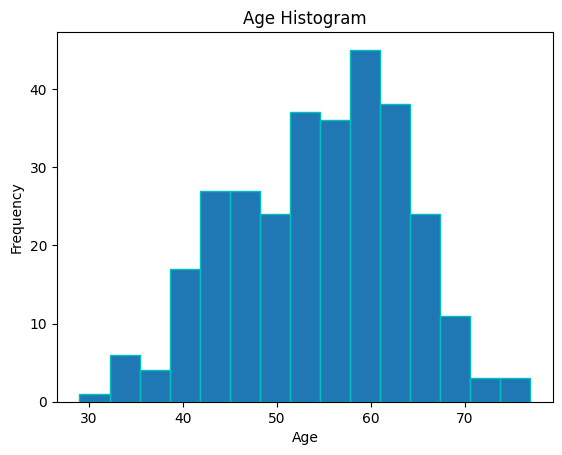

In [22]:
plt.hist(df['age'], bins=15, edgecolor='c')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

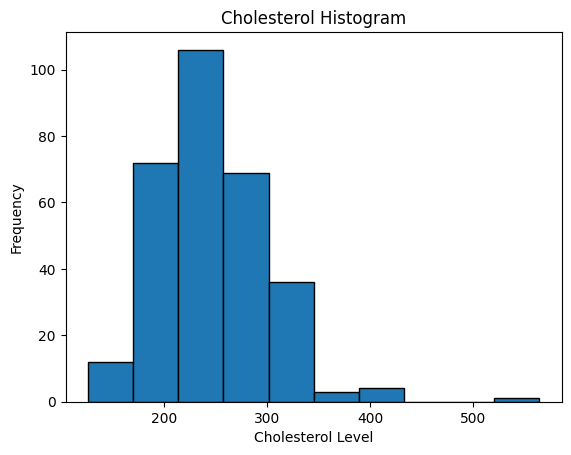

In [23]:
plt.hist(df['chol'], bins=10, edgecolor='k')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Cholesterol Histogram')
plt.show()

#Model Building and Training

In [24]:
X = df.drop(columns = 'target')
y = df.target

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# splitting our dataset into training and testing for this we will use train_test_split library.
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (227, 13), X_test size: (76, 13)


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
#feature scaling
scaler= StandardScaler()
X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler= scaler.fit_transform(X_test)

#Logistic Regression Model


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(X_train_scaler, y_train)
y_pred_LR= LR_model.predict(X_test_scaler)
LR_model.score(X_test_scaler,y_test)

0.881578947368421

In [31]:
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.91      0.84      0.87        37

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

Accuracy: 88.16%



In [32]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[36,  3],
       [ 6, 31]])

In [33]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 15  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [34]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(LR_model, X, y, cv=num_folds, scoring=scoring_metric)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [35]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.90
Fold 2: 0.90
Fold 3: 0.86
Fold 4: 0.70
Fold 5: 0.95
Fold 6: 1.00
Fold 7: 0.75
Fold 8: 0.85
Fold 9: 0.80
Fold 10: 0.75
Fold 11: 0.75
Fold 12: 0.95
Fold 13: 0.70
Fold 14: 0.85
Fold 15: 0.80


In [36]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.83
Standard Deviation: 0.09


In [37]:
filename = 'logistic_regression_model.pkl'
joblib.dump(LR_model,filename)

['logistic_regression_model.pkl']

In [38]:
with open('model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

#KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(X_train_scaler, y_train)
y_pred_knn= Knn_model.predict(X_test_scaler)
Knn_model.score(X_test_scaler,y_test)

0.8157894736842105

In [41]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.85      0.76      0.80        37

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76

Accuracy: 81.58%



In [42]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[34,  5],
       [ 9, 28]])

In [43]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [44]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(Knn_model, X, y, cv=num_folds, scoring=scoring_metric)


In [45]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.62
Fold 2: 0.67
Fold 3: 0.57
Fold 4: 0.77
Fold 5: 0.65


In [46]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.66
Standard Deviation: 0.06


#Random Forest

In [47]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(X_train_scaler, y_train)
y_pred_RF= RF_model.predict(X_test_scaler)
RF_model.score(X_test_scaler,y_test)

0.8552631578947368

In [48]:
print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.93      0.76      0.84        37

    accuracy                           0.86        76
   macro avg       0.87      0.85      0.85        76
weighted avg       0.87      0.86      0.85        76

Accuracy: 85.53%



In [49]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[37,  2],
       [ 9, 28]])

In [50]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [51]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(RF_model, X, y, cv=num_folds, scoring=scoring_metric)

In [52]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.82
Fold 2: 0.89
Fold 3: 0.79
Fold 4: 0.72
Fold 5: 0.83


In [53]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.81
Standard Deviation: 0.06


# Decison Tree Classifier

In [54]:
DT_model= DecisionTreeClassifier()
DT_model.fit(X_train_scaler, y_train)
y_pred_DT= DT_model.predict(X_test_scaler)
DT_model.score(X_test_scaler,y_test)

0.6842105263157895

In [55]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        39
           1       0.65      0.76      0.70        37

    accuracy                           0.68        76
   macro avg       0.69      0.69      0.68        76
weighted avg       0.69      0.68      0.68        76

Accuracy: 68.42%



In [56]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[24, 15],
       [ 9, 28]])

In [57]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [58]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(DT_model, X, y, cv=num_folds, scoring=scoring_metric)

In [59]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.72
Fold 2: 0.89
Fold 3: 0.70
Fold 4: 0.73
Fold 5: 0.67


In [60]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.74
Standard Deviation: 0.07


#SVC

In [61]:
SVC_model= SVC()
SVC_model.fit(X_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(X_test_scaler)
SVC_model.score(X_test_scaler,y_test)

0.8289473684210527

In [62]:
print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.85      0.78      0.82        37

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

Accuracy: 82.89%



In [63]:
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[34,  5],
       [ 8, 29]])

In [64]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [65]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(LR_model, X, y, cv=num_folds, scoring=scoring_metric)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [66]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.87
Fold 2: 0.85
Fold 3: 0.79
Fold 4: 0.82
Fold 5: 0.78


In [67]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.82
Standard Deviation: 0.03


# Naive Bayes

In [68]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [69]:
model_filename = "naive_bayes_model.pkl"
joblib.dump(classifier, model_filename)

['naive_bayes_model.pkl']

In [70]:
# with open('naive_bayes_model.pkl', 'wb') as file:
#     pickle.dump(classifier, file)

In [71]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [72]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8421052631578947

In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  4],
       [ 8, 29]])

In [74]:
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.88      0.78      0.83        37

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [75]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [76]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(classifier, X, y, cv=num_folds, scoring=scoring_metric)

In [77]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.80
Fold 2: 0.93
Fold 3: 0.80
Fold 4: 0.87
Fold 5: 0.80


In [78]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.84
Standard Deviation: 0.05


# AdaBoost

In [79]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can change the base estimator and its hyperparameters
n_estimators = 50  # The number of weak learners (adjust as needed)

classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

In [80]:
# Train the AdaBoost model
classifier.fit(X_train_scaler, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_scaler)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [81]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [82]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[30  9]
 [ 6 31]]


In [83]:
# Display classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.78      0.84      0.81        37

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [84]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # Adjust the number of folds as needed
scoring_metric = 'accuracy'  # Choose an appropriate scoring metric

In [85]:
# Use cross_val_score to perform cross-validation and obtain scores
scores = cross_val_score(classifier, X, y, cv=num_folds, scoring=scoring_metric)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [86]:
# Display cross-validation results
print(f'Cross-Validation {scoring_metric} Scores:')
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.2f}')

Cross-Validation accuracy Scores:
Fold 1: 0.82
Fold 2: 0.85
Fold 3: 0.72
Fold 4: 0.70
Fold 5: 0.77


In [87]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f'Mean {scoring_metric}: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean accuracy: 0.77
Standard Deviation: 0.06
